Eigen Faces
===

MUCT database: <a href="www.milbo.org/muct">www.milbo.org/muct</a> contains 3755 faces with manually landmarked 76 points for each face

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

import pandas

In [11]:
df = pandas.read_csv('muct76.csv', header=0, usecols=np.arange(2,154), dtype=float)

df.head()

,x00,y00,x01,y01,x02,y02,x03,y03,x04,y04,...,x71,y71,x72,y72,x73,y73,x74,y74,x75,y75
0,-39.0,-28.0,-39.0,-61.0,-38.0,-88.0,-31.0,-115.0,-16.0,-141.0,...,-4.5,-28.5,98.0,-13.5,84.0,-15.5,86.0,-22.5,100.0,-20.5
1,-78.0,-37.0,-83.0,-67.0,-80.0,-98.0,-73.0,-126.0,-58.0,-157.0,...,-37.5,-39.0,65.5,-26.0,51.5,-28.0,52.0,-34.5,66.0,-32.5
2,-28.0,-32.0,-37.0,-60.0,-40.0,-87.0,-29.0,-119.0,-16.0,-159.0,...,17.5,-35.0,104.5,-23.5,94.0,-25.0,95.0,-31.0,105.5,-29.5
3,-83.0,4.0,-85.0,-28.0,-86.0,-53.0,-81.0,-87.0,-68.0,-115.0,...,-48.0,1.0,55.5,8.5,40.0,7.0,42.0,0.0,57.5,1.5
4,-39.0,-53.0,-40.0,-88.0,-37.0,-113.0,-27.0,-143.0,-14.0,-161.0,...,-3.0,-57.5,95.5,-46.5,82.0,-49.0,84.5,-55.0,98.0,-52.5


In [14]:
X = df.iloc[:, ::2].values
Y = df.iloc[:, 1::2].values

print(X.shape, Y.shape)

(7510, 76) (7510, 76)


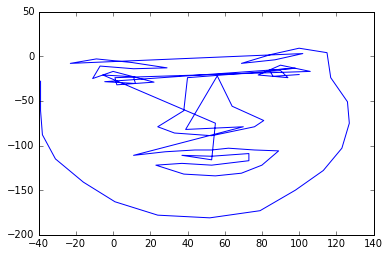

In [15]:
plt.plot(X[0,:], Y[0,:])
plt.show()

## Cmputing the mean face

By the way, mean face here refers to the average face, not mean=angry! :)


### Mean centering all images

First we need to find the center of each face, so that we can overlap all the images.

In [16]:
xmeans = np.mean(X, axis=1)
ymeans = np.mean(Y, axis=1)

xmeans.shape

(7510,)

In [18]:
## mean-centering each image

X = (X.T - xmeans).T
Y = (Y.T - ymeans).T

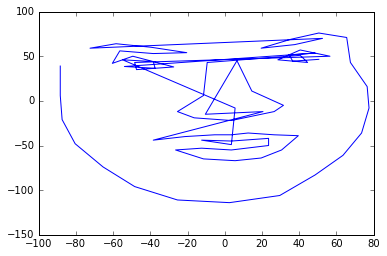

In [19]:
plt.plot(X[0,:], Y[0,:])
plt.show()

### Compute the average face

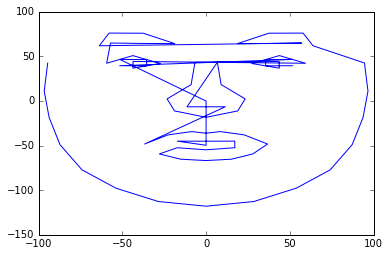

In [20]:
mean_face_x = np.mean(X, axis=0)
mean_face_y = np.mean(Y, axis=0)

plt.plot(mean_face_x, mean_face_y)
plt.show()

## Compute the eigne faces

### Covariance matrix of all faces


In [22]:
D = np.concatenate((X, Y), axis=1)
D.shape

(7510, 152)

In [24]:
cov_mat = np.cov(D.T)

cov_mat.shape

(152, 152)

In [29]:
eig_values, eig_vectors = np.linalg.eig(cov_mat)

print(eig_values.shape, eig_vectors.shape)

(152,) (152, 152)


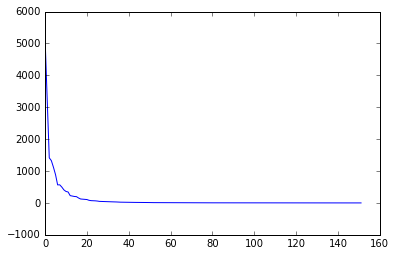

In [30]:
plt.plot(eig_values)

In [51]:
num_eigs = 5
Phi_matrix = eig_vectors[:,:num_eigs]

Phi_matrix.shape

(152, 5)

In [45]:
def construct_newface(meanface, Phi_matrix, b):
    face = meanface + np.dot(Phi_matrix, b )
    return (face[:76], face[76:])

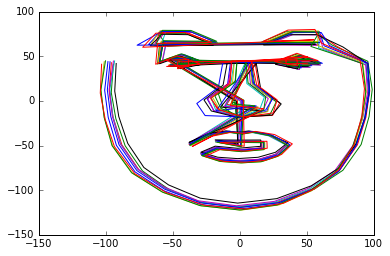

In [52]:
meanface = np.concatenate((mean_face_x, mean_face_y))

for i in range(10):
    xnew, ynew = construct_newface(meanface, Phi_matrix, 
                               b = np.random.uniform(low=-20, high=20, size=num_eigs))

    plt.plot(xnew, ynew)
    
plt.show()